In [ ]:
import pandas as pd

In [ ]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S")

In [13]:
df = pd.read_csv("/content/lesson_1_data.csv",encoding='windows-1251',sep=';', parse_dates=['Дата создания'])

In [14]:
df.tail()

,Номер,Дата создания,Дата оплаты,Title,Статус,Заработано,Город,Платежная система
287,1064720,2019-12-30 09:42:00,30.12.2019 12:49,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Завершен,2935.44,Самарская область,Яндекс.Касса
288,1064724,2019-12-30 11:32:00,NaN,Курс обучения «Консультант»,Отменен,0.00,NaN,NaN
289,1064775,2019-12-31 02:17:00,31.12.2019 2:22,Курс обучения «Консультант»,Завершен,7423.92,NaN,"Сбербанк эквайринг,Бонусный счет"
290,1064793,2019-12-31 16:40:00,01.01.2020 14:29,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Завершен,2935.44,Республика Карелия,Яндекс.Касса
291,1064796,2019-12-31 17:29:00,31.12.2019 17:32,Курс от Школы Диетологов. Повышение квалификац...,Завершен,9898.56,Уфа,"Сбербанк эквайринг,Бонусный счет"


In [15]:
df.shape

(292, 8)

In [16]:
df.dtypes

Номер                         int64
Дата создания        datetime64[ns]
Дата оплаты                  object
Title                        object
Статус                       object
Заработано                  float64
Город                        object
Платежная система            object
dtype: object

In [17]:
df.describe()

,Номер,Заработано
count,2.920000e+02,292.000000
mean,1.063745e+06,3397.615034
std,4.438688e+02,5771.572829
min,1.062823e+06,0.000000
25%,1.063608e+06,0.000000
50%,1.063698e+06,2935.440000
75%,1.063807e+06,2935.440000
max,1.064796e+06,42750.000000


In [18]:
df.columns


Index(['Номер', 'Дата создания', 'Дата оплаты', 'Title', 'Статус',
       'Заработано', 'Город', 'Платежная система'],
      dtype='object')

In [19]:
df = df.rename(columns = {'Номер' : 'number',
               'Дата создания' : 'create_date',
               'Дата оплаты': 'payment_date',
               'Title': 'title',
               'Статус': 'status',
               'Заработано' : 'money',
               'Город' : 'city',
               'Платежная система' : 'payment'})

In [20]:
df.head()

,number,create_date,payment_date,title,status,money,city,payment
0,1062823,2019-01-12 10:50:00,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [21]:
df.title

0                                Курс обучения «Эксперт»
1                                Курс обучения «Эксперт»
2                             Курс обучения «Специалист»
3                            Курс обучения «Консультант»
4                                Курс обучения «Эксперт»
                             ...                        
287    Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...
288                          Курс обучения «Консультант»
289                          Курс обучения «Консультант»
290    Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...
291    Курс от Школы Диетологов. Повышение квалификац...
Name: title, Length: 292, dtype: object

In [22]:
df[['title', 'create_date']].head()

,title,create_date
0,Курс обучения «Эксперт»,2019-01-12 10:50:00
1,Курс обучения «Эксперт»,2019-01-12 20:53:00
2,Курс обучения «Специалист»,2019-01-12 21:43:00
3,Курс обучения «Консультант»,2019-03-12 00:18:00
4,Курс обучения «Эксперт»,2019-03-12 21:43:00


**Какие курсы принесли больше всего заробатка?**
Отсортируем данные по заработку и сгруппируем по городам

In [23]:
all_money = df.money.sum()

In [24]:
all_money

992103.5900000001

Найдем суммарное количество денег

In [25]:
df.head()

,number,create_date,payment_date,title,status,money,city,payment
0,1062823,2019-01-12 10:50:00,01.12.2019 10:52,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,01.12.2019 21:27,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaN,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaN,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaN,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [26]:
df.groupby(["title"]).describe()

number                \
                                                    count          mean   
title                                                                     
Курс обучения «Консультант»                          52.0  1.063633e+06   
Курс обучения «Специалист»                           12.0  1.063759e+06   
Курс обучения «Эксперт»                              22.0  1.063392e+06   
Курс от Школы Диетологов. Бизнес                      9.0  1.064197e+06   
Курс от Школы Диетологов. Повышение квалификации.    15.0  1.064314e+06   
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосп...  182.0  1.063750e+06   

                                                                           \
                                                           std        min   
title                                                                       
Курс обучения «Консультант»                         644.997766  1062880.0   
Курс обучения «Специалист»                          647.309695  1062856.0   
Курс обучения «Эксперт»                             573.438223  1062823.0   
Курс от Школы Диетологов. Бизнес                    653.134366  1062940.0   
Курс от Школы Диетологов. Повышение квалификации.   434.234938  1063109.0   
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосп...  216.299462  1063582.0   

                                                                           \
                                                           25%        50%   
title                                                                       
Курс обучения «Консультант»                         1063054.00  1063358.5   
Курс обучения «Специалист»                          1063303.25  1063717.5   
Курс обучения «Эксперт»                             1062935.25  1063205.5   
Курс от Школы Диетологов. Бизнес                    1063964.00  1064525.0   
Курс от Школы Диетологов. Повышение квалификации.   1064219.00  1064456.0   
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосп...  1063646.50  1063696.5   

                                                                           \
                                                           75%        max   
title                                                                       
Курс обучения «Консультант»                         1064283.00  1064775.0   
Курс обучения «Специалист»                          1064288.25  1064712.0   
Курс обучения «Эксперт»                             1063740.00  1064576.0   
Курс от Школы Диетологов. Бизнес                    1064623.00  1064689.0   
Курс от Школы Диетологов. Повышение квалификации.   1064549.50  1064796.0   
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосп...  1063755.50  1064793.0   

                                                    money                \
                                                    count          mean   
title                                                                     
Курс обучения «Консультант»                          52.0   4003.144038   
Курс обучения «Специалист»                           12.0  13405.220000   
Курс обучения «Эксперт»                              22.0   6772.400000   
Курс от Школы Диетологов. Бизнес                      9.0   2083.615556   
Курс от Школы Диетологов. Повышение квалификации.    15.0   5892.328000   
Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосп...  182.0   2016.193407   

                                                                            \
                                                             std  min  25%   
title                                                                        
Курс обучения «Консультант»                          4667.543299  0.0  0.0   
Курс обучения «Специалист»                          13898.716650  0.0  0.0   
Курс обучения «Эксперт»                             13364.973144  0.0  0.0   
Курс от Школы Диетологов. Бизнес                     3427.939074  0.0  0.0   
Курс от Школы Диетологов. Повышение квалификации.    4981.333131  0.0  

In [30]:
df.groupby(["title","city"], as_index = False)\
.aggregate({'money':'sum'})\
.sort_values('money', ascending = False).head()

,title,city,money
51,Курс обучения «Эксперт»,г.Санкт-Петербург и Ленинградская область,59195.00
156,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,г.Москва и Московская область,46967.04
39,Курс обучения «Эксперт»,Балхаш,42750.00
95,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Краснодарский край,38169.78
30,Курс обучения «Специалист»,Краснодар,29695.70


In [31]:
money_by_city = df.groupby(["title","city"], as_index = False)\
.aggregate({'money':'sum'})\
.sort_values('money', ascending = False)

In [32]:
money_by_city.to_csv("mbc.csv", index = False)

In [33]:
money_by_city

,title,city,money
51,Курс обучения «Эксперт»,г.Санкт-Петербург и Ленинградская область,59195.00
156,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,г.Москва и Московская область,46967.04
39,Курс обучения «Эксперт»,Балхаш,42750.00
95,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,Краснодарский край,38169.78
30,Курс обучения «Специалист»,Краснодар,29695.70
...,...,...,...
63,Курс от Школы Диетологов. Повышение квалификац...,Кемерово,0.00
61,Курс от Школы Диетологов. Повышение квалификац...,Екатеринбург,0.00
55,Курс от Школы Диетологов. Бизнес,Крым Советский,0.00
54,Курс от Школы Диетологов. Бизнес,Киев,0.00


**Посчитать для каждого продукта, сколько было суммарных денег и завершенных заказов?**

In [34]:
money_title = df\
.query('status == "Завершен"')\
.groupby(["title"], as_index = False)\
.aggregate({'money':'sum', 'number': "count"})\
.sort_values('money', ascending = False)\
.rename(columns = {"number" : "success_order"})

In [35]:
money_title

,title,money,success_order
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,366947.20,125
0,Курс обучения «Консультант»,208163.49,31
1,Курс обучения «Специалист»,160862.64,7
2,Курс обучения «Эксперт»,148992.80,5
4,Курс от Школы Диетологов. Повышение квалификац...,88384.92,9
3,Курс от Школы Диетологов. Бизнес,18752.54,3


Проверим данные на логическую непротиворечивость

In [36]:
df.title.unique()

array(['Курс обучения «Эксперт»', 'Курс обучения «Специалист»',
       'Курс обучения «Консультант»', 'Курс от Школы Диетологов. Бизнес',
       'Курс от Школы Диетологов. Повышение квалификации. ',
       'Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосписанием'],
      dtype=object)

In [37]:
from datetime import datetime
today_day = datetime.today().strftime('%Y.%m.%d')
file_name = 'money_tittle_{}.csv'
file_name = file_name.format(today_day)

In [38]:
if (int(money_title.money.sum()) == int (all_money)):
    print("OK File {} is written".format(file_name))
    money_title.to_csv(file_name, index = False)
else:
    print("ERRoRR")

OK File money_tittle_2023.08.26.csv is written


In [39]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/360340/2_taxi_nyc.csv", parse_dates=['pickup_dt'])

In [40]:
df.shape

(29101, 14)

In [41]:
df.dtypes

pickup_dt       datetime64[ns]
pickup_month            object
borough                 object
pickups                  int64
hday                    object
spd                    float64
vsb                    float64
temp                   float64
dewp                   float64
slp                    float64
pcp 01                 float64
pcp 06                 float64
pcp 24                 float64
sd                     float64
dtype: object

В названиях столбцов pcp 01, pcp 06, pcp 24 встречается пробел. Это не очень удобно, если в дальнейшем вы планируете обращаться к колонкам через точку, без использования кавычек и скобочек.

Замените пробел в названиях на знак нижнего подчёркивания.

In [42]:
df.columns

Index(['pickup_dt', 'pickup_month', 'borough', 'pickups', 'hday', 'spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp 01', 'pcp 06', 'pcp 24', 'sd'],
      dtype='object')

In [43]:
df.rename(columns = {'pcp 01' : 'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24' : 'pcp_24'}, inplace = True)

А теперь вопрос: сколько раз в данных встречается район Бруклин (Brooklyn)?

In [44]:
df.borough.value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64

Следующая задача: выяснить, из какого района было совершено наибольшее количество поездок за весь период.

Для начала посчитайте общее количество поездок (pickups) без группировки.



In [45]:
df.pickups.sum()

14265773

А теперь сгруппируйте данные по району (borough) и укажите, из какого пункта было совершено больше всего поездок.



In [46]:
max_pickups = df.groupby("borough").aggregate({'pickups':'sum'}).idxmax()

In [47]:
max_pickups

pickups    Manhattan
dtype: object

Продолжим изучение данных и посмотрим на число поездок в выходные дни. Сгруппируйте данные по двум признакам: району города и является ли день выходным (колонки borough и hday). Сравните среднее число поездок, и выберите районы, из которых по праздникам в среднем поступает больше заказов, чем в обычные дни.



In [48]:
df.groupby(["borough", "hday"], as_index = False).aggregate({'pickups':'mean'}).sort_values(by = 'hday', ascending = False).sort_values(by = 'borough')

,borough,hday,pickups
1,Bronx,Y,48.065868
0,Bronx,N,50.771073
3,Brooklyn,Y,527.011976
2,Brooklyn,N,534.727969
5,EWR,Y,0.041916
4,EWR,N,0.023467
7,Manhattan,Y,2035.928144
6,Manhattan,N,2401.302921
9,Queens,Y,320.730539
8,Queens,N,308.899904


Для каждого района посчитайте число поездок по месяцам. Отсортируйте полученные значения по убыванию и сохраните результирующий датафрейм в pickups_by_mon_bor.



In [49]:
from datetime import datetime as dt

In [50]:
df['month'] = df['pickup_dt'].dt.month
pickups_by_mon_bor = df.groupby(["borough", "month"], as_index = False).aggregate({'pickups': 'sum'}).sort_values(by = 'pickups', ascending = False)

In [51]:
pickups_by_mon_bor.shape

(36, 3)

In [52]:
pickups_by_mon_bor

,borough,month,pickups
23,Manhattan,6,1995388
22,Manhattan,5,1888800
19,Manhattan,2,1718571
20,Manhattan,3,1661261
21,Manhattan,4,1648278
18,Manhattan,1,1455543
11,Brooklyn,6,482466
10,Brooklyn,5,476087
9,Brooklyn,4,378095
8,Brooklyn,3,346726


Теперь задача посложнее! Попрактикуемся в написании собственных функций и их применении к датафрейму. Поскольку данные о поездках в Нью-Йорке, температура представлена в градусах Фаренгейта.

Напишите функцию temp_to_celcius, которая получает на вход колонку с температурой в °F и возвращает значения, переведённые в градусы Цельсия.

Формула:
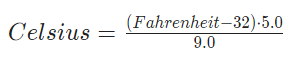

In [53]:
def temp_to_celcius(f):
    c = ((f - 32)*5)/9
    return c

In [54]:
temp_to_celcius(df['temp'][:5])

0   -1.111111
1   -1.111111
2   -1.111111
3   -1.111111
4   -1.111111
Name: temp, dtype: float64